part 1 - EDA

In [1]:
!pip install librosa

In [2]:
import matplotlib.pyplot as plt
import IPython.display as ipd
import librosa
import librosa.display
import numpy as np


In [3]:
filename='UrbanSound8K/drill.wav'  

In [4]:
plt.figure(figsize=(14,5)) #to create a new figure or activate an existing figure
data,sample_rate=librosa.load(filename) # gives 2 information - data and sample_rate
ipd.Audio(filename) #Creating an audio object

<Figure size 1400x500 with 0 Axes>

In [5]:
sample_rate 

22050

In [6]:
print(data)   #we can see librosa gives us a normalised numpy array

print(data.size)   #this array contains 22050 * 4 values (4 secs is length of audio clip)

[-0.0150127  -0.02784598 -0.03132447 ...  0.01685495  0.01496585
  0.01400998]
88200


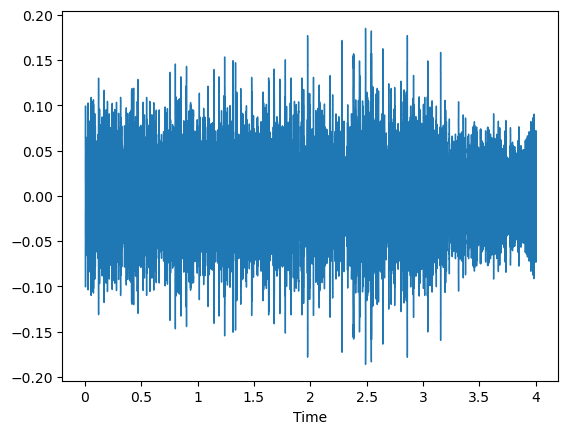

In [7]:
librosa.display.waveshow(data, sr=sample_rate)



 Librosa is now getting popular for audio signal processing because of the following three reasons.

It tries to converge the signal into mono(one channel).
It can represent the audio signal between -1 to +1(in normalized form), so a regular pattern is observed.
It is also able to see the sample rate, and by default, it converts it to 22 kHz, while in the case of other libraries, we see it according to a different value.

#audio is recorded in either mono or sterio channel, it is recorded in varied sample rate like 44hz, 33 hz 11hz ,etc
#by using librosa we are able to make the sample rate constant
#resaon of using librosa or scipy -   when we print the data retrieved from librosa, it can be normalized, but when we try to read an audio file using scipy, it can’t be normalized.

To digitize a sound wave we must turn the signal into a series of numbers so that we can input it into our models. This is done by measuring the amplitude of the sound at fixed intervals of time.

Each such measurement is called a sample, and the sample rate is the number of samples per second. For instance, a common sampling rate is about 44,100 samples per second. That means that a 10-second music clip would have 441,000 samples.

In [8]:
import pandas as pd
df = pd.read_csv('UrbanSound8K.csv')
df.head(10)


,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
5,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,children_playing
6,100263-2-0-161.wav,100263,80.500000,84.500000,1,5,2,children_playing
7,100263-2-0-3.wav,100263,1.500000,5.500000,1,5,2,children_playing
8,100263-2-0-36.wav,100263,18.000000,22.000000,1,5,2,children_playing
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn


In [9]:
df['class'].value_counts()

dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

part 2 - data preprocessing

feature extraction - mfcc 

In a spectrogram, the x-axis represents time, the y-axis represents frequency, and the color represents the intensity of the frequencies at a particular point in time. Darker areas usually indicate higher intensity or amplitude of the frequencies.

A mel spectrogram, often referred to as a mel spectrogram or mel-frequency spectrogram, is a variation of the traditional spectrogram that incorporates the concept of mel frequency scaling. Mel frequency scaling is a perceptual scale of pitches that approximates the human ear's response to different frequencies.
In a standard spectrogram, the frequency axis is linear, meaning that each point on the axis corresponds to an equal step in Hertz. However, human perception of pitch is not linear, and we are more sensitive to changes in lower frequencies than higher frequencies. The mel scale is a non-linear scale that better represents the way humans perceive pitch.

How humans percieve pitch- 
humans do not percieve pitch linearly, and we have better resolution at lower frequency than at higher frequency. for example - we percieve the difference in pitch between 300 and 500 Hz more clearly than we do between 1300 and 1500 Hz even though the difference between both is off 200 Hz. So Humans percieve frequency logarithmically.

Our ideal audio feature should  have  1) time frequency representation
                                      2) perceptually relevant amplitude rep
                                      3) perceptually relevant frequency rep
the normal spectogram ensures first 2 points, but only the mel spectogram ensures all 3 points, including the 3rd one.

The mel scale is a perceptual scale of pitches that approximates the human ear's response to different frequencies. It is used in the creation of mel spectrograms, where the frequency axis is scaled according to the mel scale to better match human perception of pitch.





spectrum vs spectogram

A spectrum is a representation of the distribution of energy or amplitude across different frequencies in a signal at a specific point in time. It is a snapshot of the frequency content of a signal at a single instant. The x-axis of a spectrum typically represents frequency, and the y-axis represents the amplitude or power at each frequency.  
A 'z spectrum' in general definition is a graph of variations of z mapped with frequency on the x-axis.

A spectrogram, on the other hand, is a time-varying representation of the spectrum of a signal. Unlike a spectrum, which provides information at a specific point in time, a spectrogram shows how the frequency content of a signal changes over time. It is a 2D plot with time on the x-axis, frequency on the y-axis, and color or intensity representing the amplitude or power of the frequencies at each point in time.

MFCCs

Cepstral analysis is employed to separate the information related to the source of a signal.

Mel Frequency Cepstral Coefficients (MFCCs) are a feature representation widely used in speech and audio signal processing. They are derived from the mel-frequency cepstrum, which, in turn, is based on the mel scale and cepstral analysis.

Here's a breakdown of the key components:

Mel-Frequency Cepstral Analysis:

Mel-frequency cepstral analysis involves several steps:
Frame the Signal: The input signal (such as a speech signal) is divided into short overlapping frames.
Apply the Fourier Transform: For each frame, the Fourier Transform is applied to obtain the power spectrum.
Mel Filtering: The power spectrum is then passed through a set of filters spaced according to the mel scale. These filters are designed to mimic the frequency resolution of the human ear.
Logarithmic Compression: The logarithm of the filter bank energies is taken. This is done to mimic the human ear's logarithmic response to loudness.
Discrete Cosine Transform (DCT): The DCT is applied to the log-filter bank energies to decorrelate the coefficients. The resulting coefficients are the cepstral coefficients.


Mel Frequency Cepstral Coefficients (MFCCs):

The MFCCs are the coefficients obtained after the cepstral analysis. They capture the essential characteristics of the spectral envelope of a signal and are commonly used as features in tasks such as speech and speaker recognition.

MFCCs provide a compact representation of the spectral characteristics of a signal, emphasizing features that are relevant for human perception. They are widely used in various applications, including automatic speech recognition, speaker identification, and other audio processing tasks.



what is a cepstrum?

cepstrum is formed when you take an inverse fourier transform of a spectrum. basically cepstrum can also be understood as spectrum of a spectrum. but the x axis of a cepstrum is not frequency (which is for a spectrum), it is a pseudo frequency concept called quefrency.

when you are in the time domain (time on x axis) you take fourier transform to move to the frequency domain (frequency on x axis). but when you are in the frequency domain itself, fourier transform takes you to a pseudo frequency domain of quefrency. so just like the x axis of spectrum has frequency, the x axis of cepstrum has quefrency.

In [10]:
#extracting MFCC
mfcc= librosa.feature.mfcc(y=data, n_mfcc= 13, sr= sample_rate)
print(mfcc.shape)
print(mfcc)

(13, 173)
[[-2.7087872e+02 -2.3318111e+02 -2.3419044e+02 ... -2.9572949e+02
  -2.9683560e+02 -3.1485751e+02]
 [ 1.4213406e+02  1.3510388e+02  1.3920912e+02 ...  1.5019499e+02
   1.5344643e+02  1.4986282e+02]
 [ 6.0223637e+00  5.3649330e+00  1.1237539e+01 ...  2.6362915e+01
   2.8327732e+01  2.8149483e+01]
 ...
 [-6.4102459e-01  6.0891211e-01  2.7704901e-01 ... -1.2943382e+00
  -1.4617671e+00  8.2987463e-01]
 [ 3.0642757e+00  3.2914944e+00  5.7308712e+00 ...  4.7168627e+00
   3.7541075e+00  3.1255516e-01]
 [-7.1098089e+00 -6.3353820e+00 -1.9439960e-01 ...  1.9699738e+00
   2.4251781e+00  1.2861887e+00]]


In [11]:
#extracting MFCC for all audio files
import pandas as pd
import os

audio_dataset_path = 'UrbanSound8K/audio/'
metadata = pd.read_csv('UrbanSound8K.csv')
metadata.head()




,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


we have to extract features from all the audio files and prepare the dataframe. So, we will create a function that takes the filename(file path where it is present). It loads the file using librosa, where we get 2 information. First, we’ll find MFCC for the audio data, And to find out scaled features, we’ll find the mean of the transpose of an array.

In [12]:
def feature_extractor(file):
    data, sample_rate = librosa.load(file)
    mfccs =  librosa.feature.mfcc(y=data,n_mfcc=40,sr=sample_rate)
    # n_mfcc refers to the number of Mel-frequency cepstral coefficients (MFCCs) to compute. 
    mfccs_scaled_features = np.mean(mfccs.T,axis=0)

    return mfccs_scaled_features



In [13]:
from tqdm import tqdm
# Now we iterate through every audio file and extract features
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name=os.path.join(os.path.abspath(audio_dataset_path), 'fold' + str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    final_class_labels = row["class"]
    data = feature_extractor(file_name)
    extracted_features.append([data,final_class_labels])

    

12it [00:00, 32.10it/s]

3550it [00:50, 70.41it/s] /Users/aryamanjain/anaconda3/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
8326it [01:52, 132.72it/s]/Users/aryamanjain/anaconda3/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
/Users/aryamanjain/anaconda3/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(
8732it [01:56, 75.14it/s] 


In [14]:
# converting extracted_features to Pandas dataframe

extracted_features_df = pd.DataFrame(extracted_features, columns=['feature','class'])
extracted_features_df.head()


,feature,class
0,"[-211.93698, 62.581207, -122.81315, -60.745293...",dog_bark
1,"[-417.0052, 99.336624, -42.995586, 51.073326, ...",children_playing
2,"[-452.39316, 112.36253, -37.578075, 43.195866,...",children_playing
3,"[-406.47922, 91.1966, -25.043556, 42.78452, 11...",children_playing
4,"[-439.63873, 103.86223, -42.65879, 50.690277, ...",children_playing


In [48]:
# Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
yy=np.array(extracted_features_df['class'].tolist())

X_train: Training set for the features 

X_test: Testing set for the features 

y_train: Training set for the labels.

y_test: Testing set for the labels.

In [46]:
X.shape

(8732, 40)

In [49]:
print(X[0].size)  # this confirms 40 coefficients per sample

40


In [50]:
yy.shape

(8732,)

In [55]:
print(yy)

['dog_bark' 'children_playing' 'children_playing' ... 'car_horn'
 'car_horn' 'car_horn']


In [88]:
#y=np.array(pd.get_dummies(yy)) 
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(yy))

In [89]:
print(y)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [90]:
y.shape

(8732, 10)

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

Model 

In [ ]:
!pip3 install tensorflow


  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/85/15/cf99a373812d37f8ae99752a34a9f5f690d820ceb5b302e922705bc18944/tensorflow-2.15.0-cp311-cp311-macosx_12_0_arm64.whl.metadata
  Obtaining dependency information for tensorflow-macos==2.15.0 from https://files.pythonhosted.org/packages/eb/9f/0759e2fea4a3c48f070b64811c2c57036b46353ba87263afc810b8f4188a/tensorflow_macos-2.15.0-cp311-cp311-macosx_12_0_arm64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/01/e4/dc0a1dcc4e74e08d7abedab278c795eef54a224363bb18f5692f416d834f/absl_py-2.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/6f/12/d5c79ee252793ffe845d58a913197bfa02ae9a0b5c9bc3dc4b58d477b9e7/flatbuffers-23.5.26-py2.py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 3.8 MB/s eta 0:00:00
  Obtaining dependency inf

In [64]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics
import tensorflow.keras.models


In [30]:
#no. of classes
num_labels = y.shape[1]

In [56]:
model = Sequential()
#first layer 
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
#second layer 
model.add(Dense(200,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
#third layer 
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

#final layer 
model.add(Dense(num_labels))
model.add(Activation('softmax')) #softmax because it is a multiclassifier





In [57]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4100      
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               20200     
                                                                 
 activation_1 (Activation)   (None, 200)               0         
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               2

In [58]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [61]:
#Training model 
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)


Epoch 1/100
191/219 [=========================>....] - ETA: 0s - loss: 0.8619 - accuracy: 0.7176
Epoch 1: val_loss improved from inf to 0.66946, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 0s 1ms/step - loss: 0.8645 - accuracy: 0.7138 - val_loss: 0.6695 - val_accuracy: 0.8037
Epoch 2/100
212/219 [============================>.] - ETA: 0s - loss: 0.8723 - accuracy: 0.7096
Epoch 2: val_loss did not improve from 0.66946
219/219 [==============================] - 0s 1ms/step - loss: 0.8739 - accuracy: 0.7087 - val_loss: 0.6736 - val_accuracy: 0.7939
Epoch 3/100
174/219 [======================>.......] - ETA: 0s - loss: 0.8741 - accuracy: 0.7196
Epoch 3: val_loss improved from 0.66946 to 0.66635, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 0s 1ms/step - loss: 0.8685 - accuracy: 0.7187 - val_loss: 0.6663 - val_accuracy: 0.7876
Epoch 4/100
200/219 [==========================>...] - ETA:

In [62]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.806525468826294


In [99]:
filename= "UrbanSound8K/horn.wav"
prediction_feature = feature_extractor(filename)
prediction_feature = prediction_feature.reshape(1,-1)
prediction_probabilities = model.predict(prediction_feature)
predicted_class=np.argmax(model.predict(prediction_feature), axis=1)
print(model.predict(prediction_feature))
print(predicted_class)
name_predicted_class = labelencoder.inverse_transform(predicted_class)
print(name_predicted_class)



1/1 [==============================] - 0s 15ms/step
[[9.91635472e-38 1.00000000e+00 9.13826017e-32 2.49695847e-15
  5.57541901e-17 2.05352223e-27 5.11401168e-31 2.08592460e-34
  6.82396301e-23 1.07059455e-08]]
[1]
['car_horn']
